In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df=pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


2. High Level Data Understanding:

    a. Find no. of rows & columns in the dataset

    b. Data types of columns.

    c. Info & describe of data in dataframe

In [4]:
print('Number of rows in given dataframe is :',df.shape[0])
print('Number of columns in given dataframe is :',df.shape[1])

Number of rows in given dataframe is : 57394
Number of columns in given dataframe is : 49


In [5]:
print('Data types of given dataframe is :\n\n',df.dtypes)

Data types of given dataframe is :

 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float

In [6]:
print('Info and describe of dataframe is :')
print(df.info())
df.describe()

Info and describe of dataframe is :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_c

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


3. Low Level Data Understanding :
    
    a. Find count of unique values in location column.

    b. Find which continent has maximum frequency using values counts.

    c. Find maximum & mean value in 'total_cases'.

    d. Find 25%,50% & 75% quartile value in 'total_deaths'.

    e. Find which continent has maximum 'human_development_index'. 

    f. Find which continent has minimum 'gdp_per_capita

In [7]:
# Find count of unique values in location column.
print('The count of unique values is :', df.location.nunique())

The count of unique values is : 216


In [8]:
# Find which continent has maximum frequency using values counts.
a=df.continent.value_counts().sort_values(ascending=False).head(1)
print('The continent with maximum frequency is :',a)

The continent with maximum frequency is : continent
Europe    14828
Name: count, dtype: int64


In [9]:
# Find maximum & mean value in 'total_cases'.
print(f'The maximum number of total cases is : {df.total_cases.max()}')
print(f'The maximum number of total cases is : {df.total_cases.mean()}')

The maximum number of total cases is : 55154651.0
The maximum number of total cases is : 167797.3688753302


In [10]:
# Find 25%,50% & 75% quartile value in 'total_deaths'.
df.total_deaths.quantile([0.25,0.5,0.75])

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64

In [11]:
# Find which continent has maximum 'human_development_index'.
a=df.groupby('continent')['human_development_index']
print(a.max().sort_values(ascending=False).head(1).reset_index()['continent'])

# or df.groupby('continent')['human_development_index'].max().idxmax()

0    Europe
Name: continent, dtype: object


In [12]:
# Find which continent has minimum 'gdp_per_capita'
a=df.groupby('continent')['gdp_per_capita']
a.min().sort_values().reset_index()['continent'].head(1)

# or df.groupby('continent')['gdp_per_capita'].min().idxmin()

0    Africa
Name: continent, dtype: object

4. Filter the dataframe with only this columns

['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame

In [14]:
df=df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
df.head()


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


5. Data Cleaning

 a. Remove all duplicates observations
    
 b. Find missing values in all columns

 c. Remove all observations where continent column value is missing
 Tip : using subset parameter in dropna
        
 d. Fill all missing values with 0


In [15]:
# a. Remove all duplicates observations
df.dropna()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
84,Asia,Afghanistan,24/03/20,40.0,1.0,1803.987,0.498
85,Asia,Afghanistan,25/03/20,42.0,1.0,1803.987,0.498
86,Asia,Afghanistan,26/03/20,75.0,1.0,1803.987,0.498
87,Asia,Afghanistan,27/03/20,75.0,1.0,1803.987,0.498
88,Asia,Afghanistan,28/03/20,91.0,2.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [16]:
# b. Find missing values in all columns
df.isna().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [17]:
# c. Remove all observations where continent column value is missing Tip : using subset parameter in dropna
df.dropna(subset='continent')

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [18]:
# d. Fill all missing values with 0
df.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


6. Date time format :
    
 a. Convert date column in datetime format using pandas.to_datetime

 b. Create new column month after extracting month data from date column.


In [19]:
df['date']=pd.to_datetime(df['date'])

In [20]:
df['month']=df['date'].dt.month

7. Data Aggregation:
    
 a. Find max value in all columns using groupby function on 'continent' column
 Tip: use reset_index() after applying groupby
 
 b. Store the result in a new dataframe named 'df_groupby'.
 (Use df_groupby dataframe for all further analysis)

In [21]:
df_groupby=df.groupby('continent').max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


8. Feature Engineering :

 a. Create a new feature 'total_deaths_to_total_cases' by ratio of
 'total_deaths' column to 'total_cases'

In [22]:
df_groupby['total_deaths_to_total_cases']=df_groupby['total_deaths']/df_groupby['total_cases']
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


9. Data Visualization :
    
 a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
 
 b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
 
 c. Plot Pairplot on df_groupby dataset.
 
 d. Plot a bar plot of 'continent' column with 'total_cases' .Tip : using kind='bar' in seaborn catplo

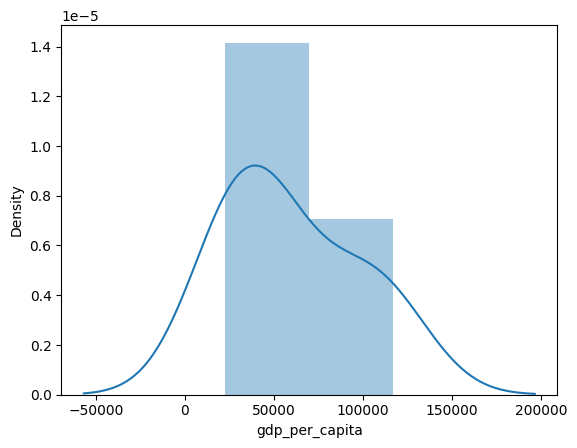

In [23]:
sns.distplot(df_groupby['gdp_per_capita'],kde=True)
plt.show()

Text(0, 0.5, 'gdp_per_capita')

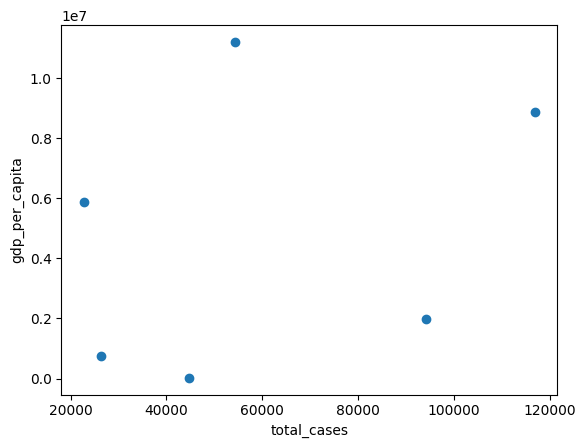

In [24]:
plt.scatter(df_groupby['gdp_per_capita'],df_groupby['total_cases'])
plt.xlabel('total_cases')
plt.ylabel('gdp_per_capita')

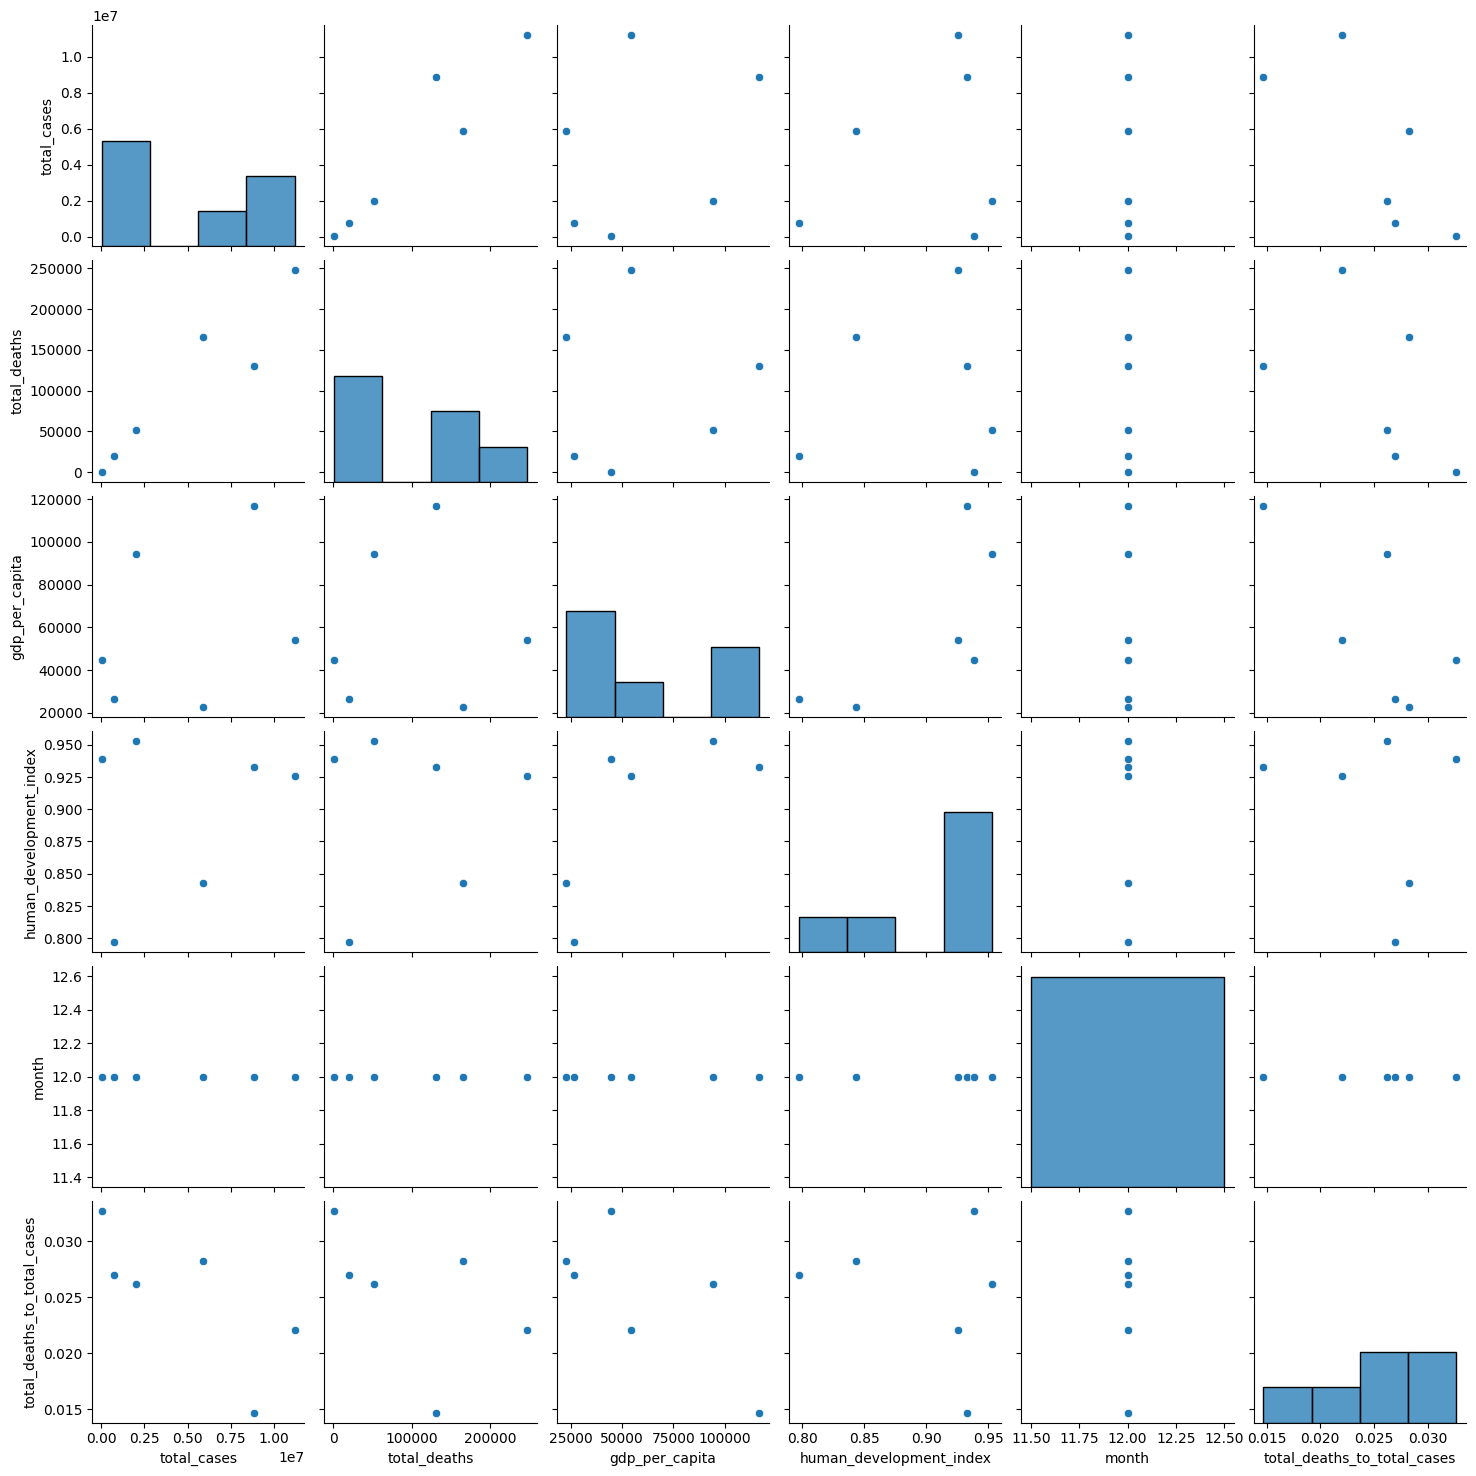

In [25]:
sns.pairplot(data=df_groupby)

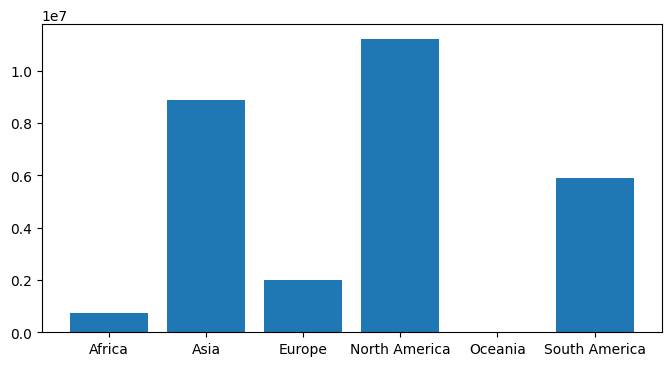

In [31]:
# Plot a bar plot of 'continent' column with 'total_cases' .Tip : using kind='bar' in seaborn catplot
plt.figure(figsize=(8,4))
plt.bar(df_groupby['continent'],df_groupby['total_cases'])
plt.show()

10.Save the df_groupby dataframe in your local drive using pandas.to_csv function 

In [32]:
df_groupby.to_csv('groupby.csv')